In [25]:

# %%
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors  # Import for normalization

%matplotlib widget

def FDC(func, x, h):
    H = np.eye(x.size) * h
    return np.array([(func(x + hi) - func(x - hi)) / 2 for hi in H[:,]])


def GD(func, x, h, rho, max_iter):
    iter_count = 0
    while np.linalg.norm(FDC(func, x, h)) > rho and iter_count < max_iter:
        x = x - rho * FDC(func, x, h)
        iter_count += 1
    return x


E = lambda x: [x[0] + x[1] + x[2] - 1, x[0] * (x[0] - 4 - x[1]) - 1]


def J(x):
    return x[0] ** 2 - 4 * x[0] - x[0] * x[1] + x[0] * x[2] + x[1] * x[2]


def tildJ_alpha(alphas):
    return lambda x: J(x) + np.dot(alphas, np.abs(E(x)))


x0 = np.ones(3)
_alphas = np.linspace(0, 4, num=20)  # Range for alpha values
_A1, _A2 = np.meshgrid(_alphas, _alphas)
Alphas = np.stack([_A1, _A2], -1)  # Shape (10, 10, 2)

X_alphas = np.empty(Alphas.shape[:2], dtype=object)
E_values = np.empty(Alphas.shape[:2], dtype=object)
J_values = np.empty(Alphas.shape[:2])
distopt = np.empty(Alphas.shape[:2])

for i in range(Alphas.shape[0]):
    for j in range(Alphas.shape[1]):
        X_alphas[i, j] = GD(
            tildJ_alpha(Alphas[i, j]), x=x0, h=1e-1, rho=1e-2, max_iter=100
        )
        distopt[i,j] = np.linalg.norm(X_alphas[i,j]-np.array([1,-1,1]))
        E_values[i, j] = np.linalg.norm(E(X_alphas[i, j]))
        J_values[i, j] = J(X_alphas[i, j])



Text(0.5, 0, 'J(x)')

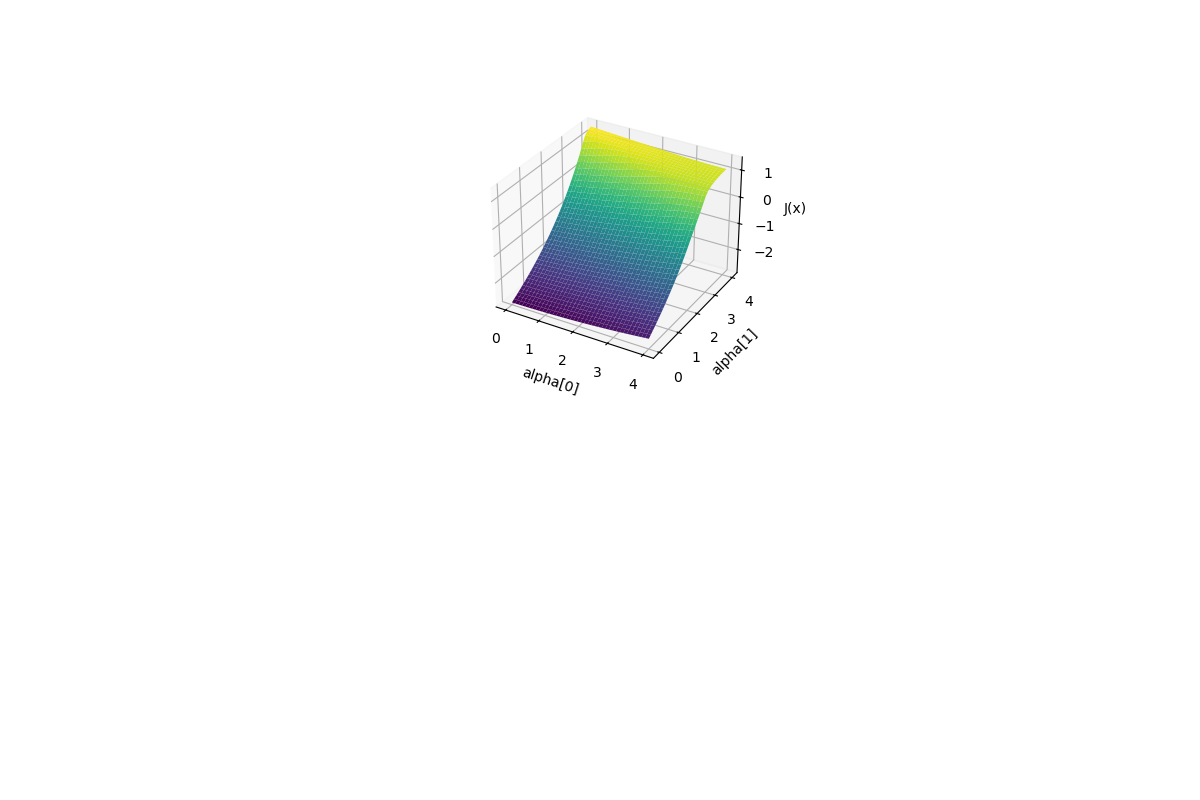

In [26]:
norm = mcolors.Normalize(vmin=np.min(J_values), vmax=np.max(J_values))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(211, projection="3d")
surf = ax.plot_surface(_A1, _A2, J_values,cmap='viridis', edgecolor='none', norm=norm)

ax.set_xlabel("alpha[0]")
ax.set_ylabel("alpha[1]")
ax.set_zlabel("J(x)")
# ax.set_title(
#     "Surface Plot of Penalized Objective Function J(x) with Color Based on Height"
# )

Text(0.5, 0.92, 'Surface Plot of Penalized Objective Function J(x) with Color Based on Height')

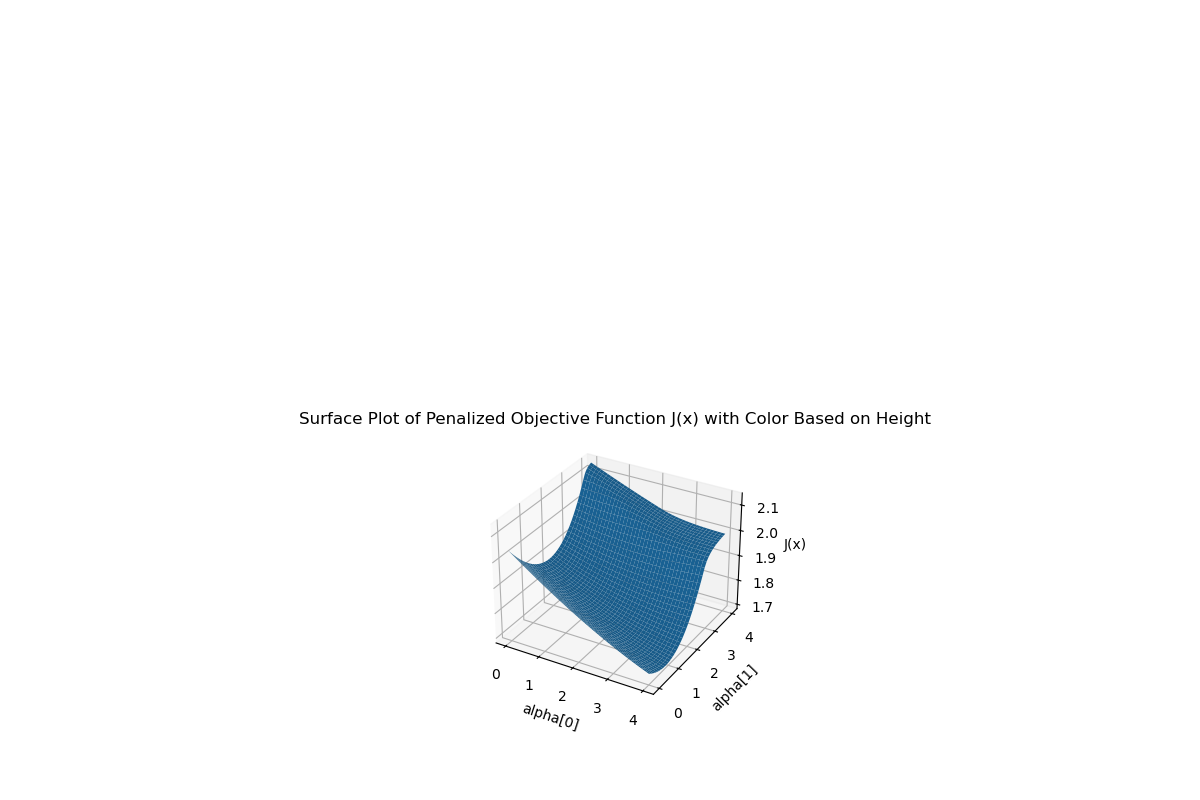

In [27]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(212, projection="3d")
surf = ax.plot_surface(_A1, _A2, distopt)

ax.set_xlabel("alpha[0]")
ax.set_ylabel("alpha[1]")
ax.set_zlabel("J(x)")
ax.set_title(
    "Surface Plot of Penalized Objective Function J(x) with Color Based on Height"
)

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax =fig.add_subplot(111)
contour = ax.contour(_A1, _A2, J_values,  cmap='plasma', alpha=0.5)

plt.tight_layout()
ax.legend()
plt.show()
